In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.layers import BatchNormalization
#import xgboost as xgb

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Input, Layer
from tensorflow.keras.models import Model
import statistics
import random

#import osgeo as gdal
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import geopandas as gpd
import rasterio as rio
import shutil, os
import shapely
import csv
import os
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling
import pandas

#sns.set(font_scale=1.35, style='whitegrid')
#%config Completer.use_jedi = False

# For tuning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from time import time

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
from matplotlib import pyplot
#import hydroeval as he
from keras.utils.vis_utils import plot_model

from sklearn.datasets import make_blobs
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## RF
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from pylab import text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
sns.set(font_scale=1.35, style='whitegrid')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import joblib

#matplotlib.rc('xtick', labelsize=25)
#matplotlib.rc('ytick', labelsize=25)

In [ ]:
'''
1)This Code geenrates true vs TL3 predicted SWE maps.
2)Generates Colorado and California maps,
3)Calculates R2, standard deviation around R2 values, and bias.
4)Plots feature importance plots for TL2 and TL3 models.
'''

# SWE Maps

34/34 [==============================] - 0s 1ms/step


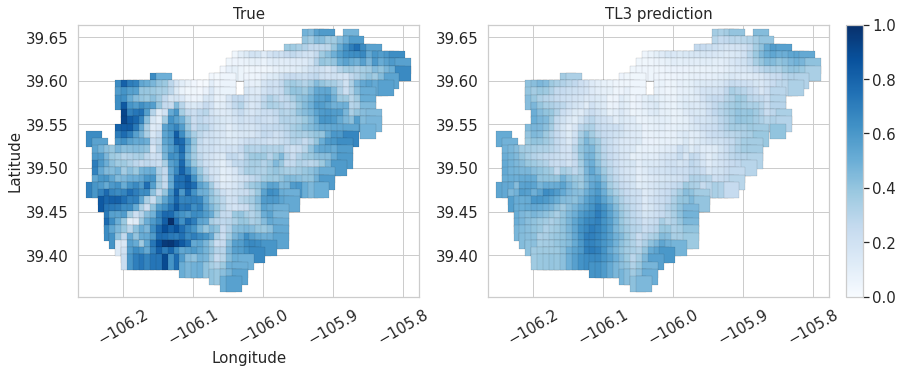

35/35 [==============================] - 0s 1ms/step


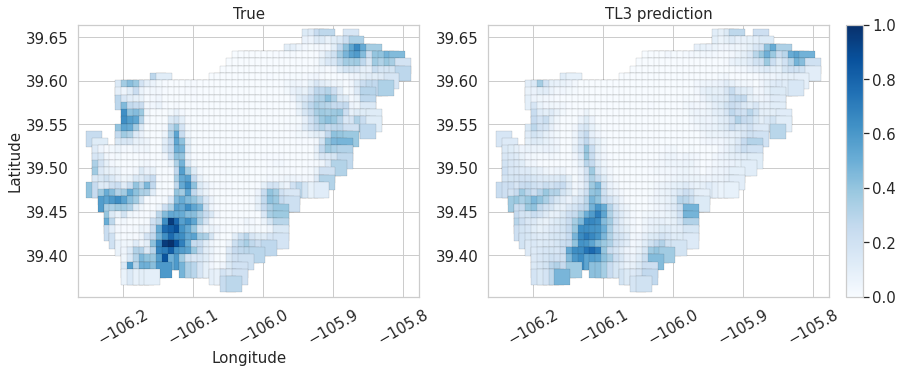

6/6 [==============================] - 0s 1ms/step


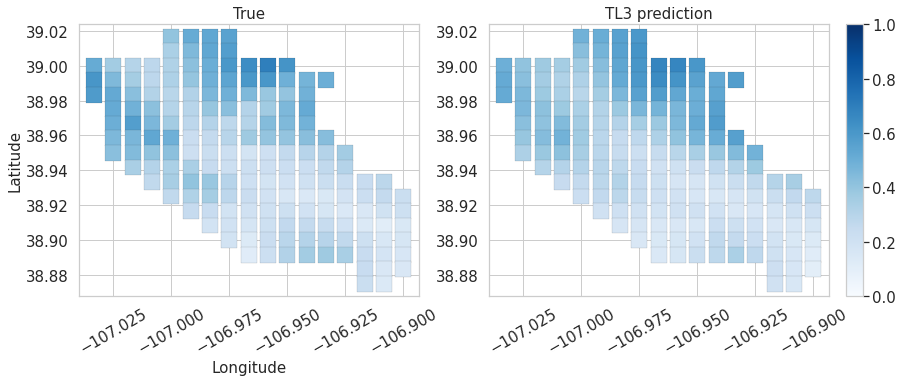

13/13 [==============================] - 0s 1ms/step


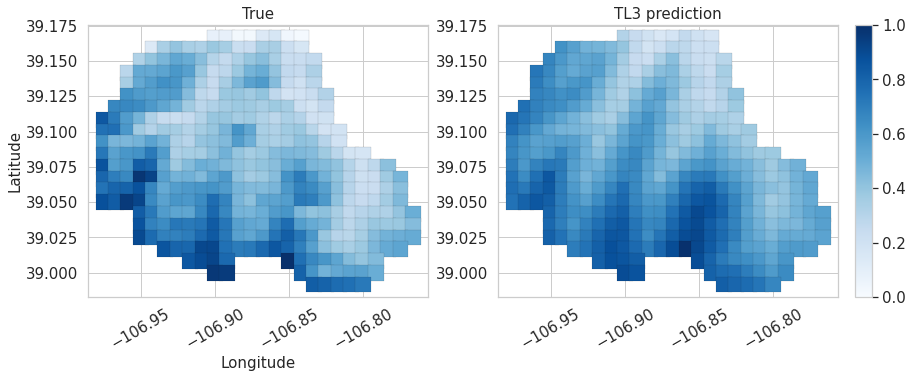

13/13 [==============================] - 0s 1ms/step


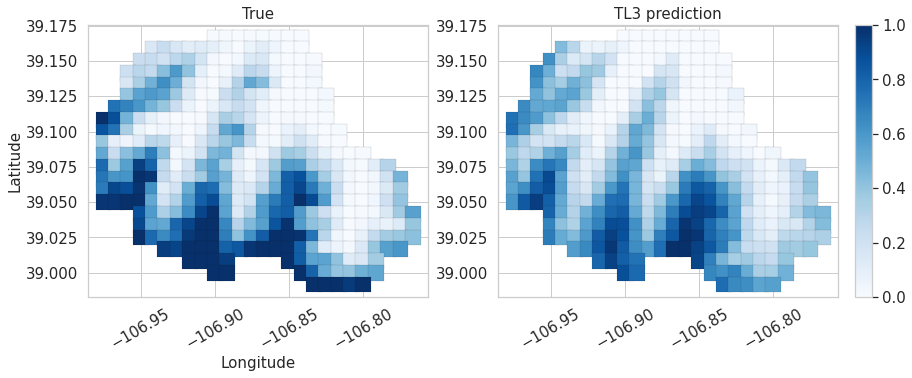

34/34 [==============================] - 0s 1ms/step


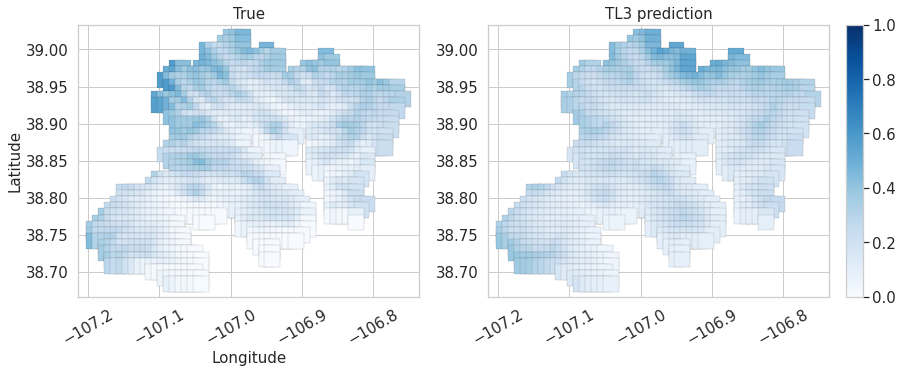

42/42 [==============================] - 0s 1ms/step


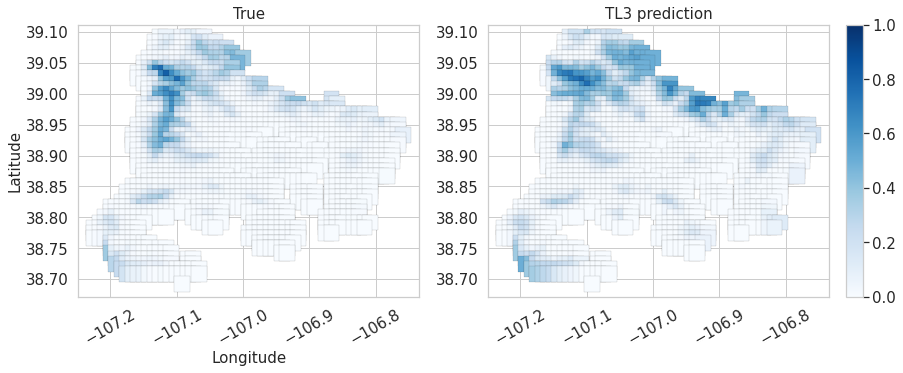

34/34 [==============================] - 0s 1ms/step


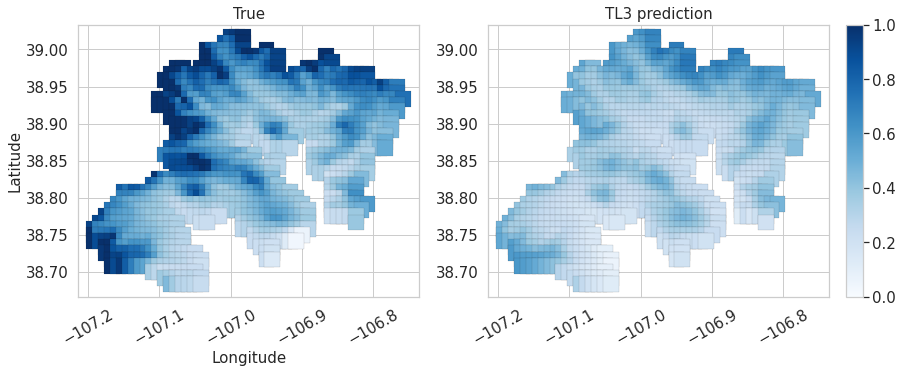

34/34 [==============================] - 0s 1ms/step


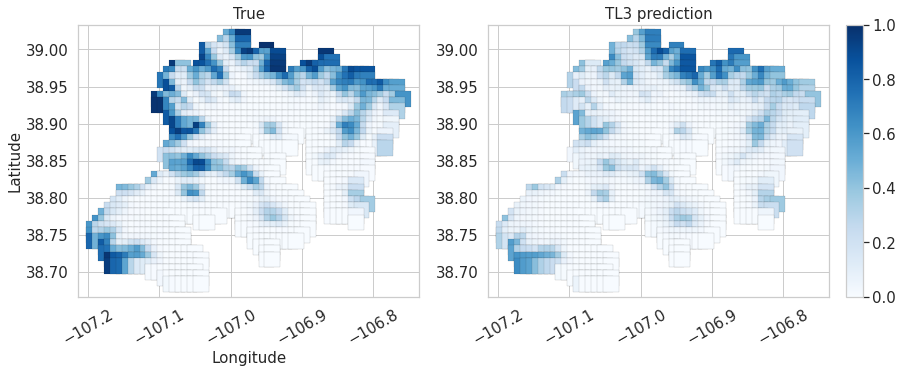

24/24 [==============================] - 0s 1ms/step


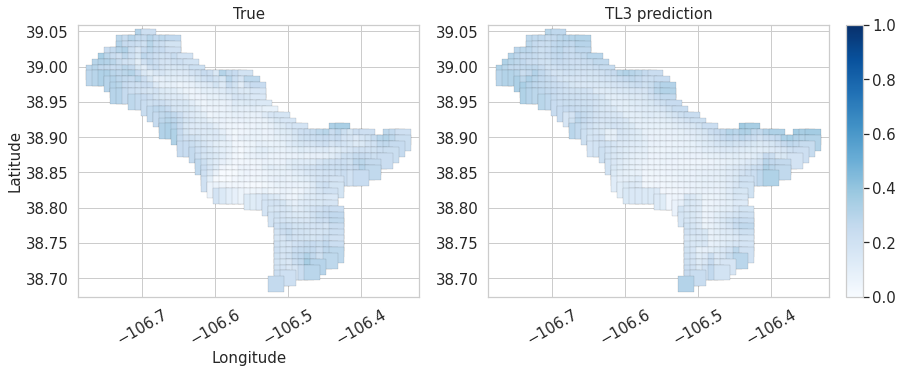

24/24 [==============================] - 0s 1ms/step


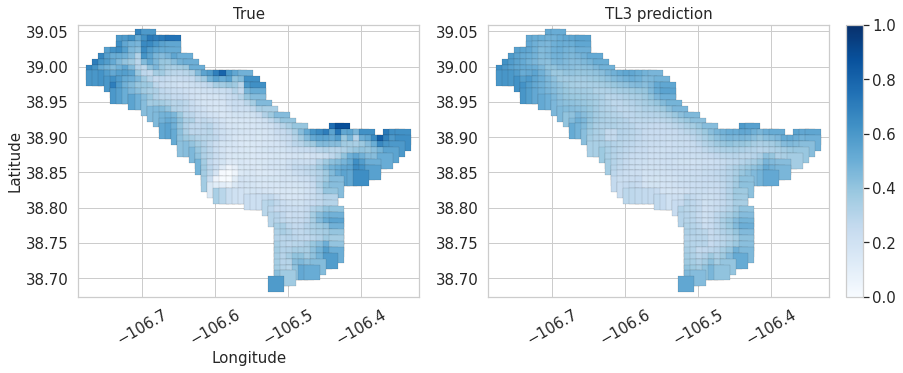

24/24 [==============================] - 0s 1ms/step


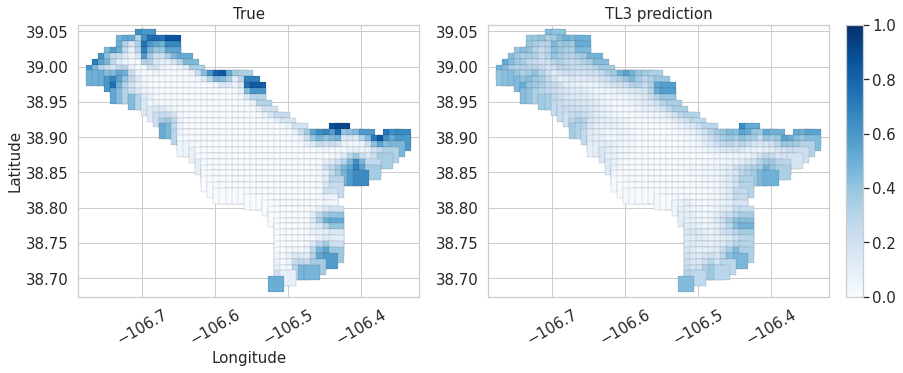

In [ ]:
    from sklearn.metrics import r2_score
    from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
    ASO_files = ['BR20190419_Data_set_SWE.csv', 'BR20190624_Data_set_SWE.csv', 'CB20160404_Data_set_SWE.csv',
                    'CM20190407_Data_set_SWE.csv', 'CM20190610_Data_set_SWE.csv', 'GE20180331_Data_set_SWE.csv',
                    'GE20180524_Data_set_SWE.csv', 'GE20190407_Data_set_SWE.csv', 'GE20190610_Data_set_SWE.csv',
                    'GT20180330_Data_set_SWE.csv', 'GT20190408_Data_set_SWE.csv', 'GT20190609_Data_set_SWE.csv']


    TL_3_models = ['TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7BR20190419',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7BR20190624',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7CB20160404',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7CM20190407',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7CM20190610',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GE20180331',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GE20180524',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GE20190407',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GE20190610',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GT20180330',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GT20190408',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GT20190609']


   #1. LOOCV method
    n_splits= len(ASO_files)
    kfold = KFold(n_splits, shuffle=False, random_state=None)

   #2. Set Plot parameters
    Clr_map = 'Blues'
    Marker = 's'
    marker_size = 250
    fs = 15 # plot font size

    for train_ix, test_ix in kfold.split(ASO_files):

        # load models
        TL_3_model = keras.models.load_model('/scratch/users/lie08/TL_REM_ADD_Troubleshooting/' + TL_3_models[test_ix[0]])

        #3. TEST FILES
        Test_file = ASO_files[test_ix[0]]
        Var_list = ['Slope','Aspect','DEM','Sum PDD','Accumulated Snow','Accumulate Precipitation','Average Temperature','SWE']

        # Test set:
        df_test = pd.read_csv(Test_file, index_col = 0)
        df_Test = df_test[Var_list]

        last_num = len(Var_list) - 1

        X_test =  df_Test.values[:, 0:last_num]
        y_test = df_Test.values[:, last_num]


        # predict with Unscaled LM and TL 3
        TL3_predictions = TL_3_model.predict(X_test)

        labels = y_test

        # R2 values
        TL3_R2 = r2_score(labels, TL3_predictions)

        #Retrieve test file name from Test_file
        name = Test_file.split('_')[0]
        basin = name[0:2]
        date_str = name[2:]
        date_str_mod = datetime.datetime.strptime(date_str, '%Y%m%d').strftime("%d %b %Y")
        title = f'{basin}: {date_str_mod}'

        # scatter plot of True SWE values and SWE predictions using LM scaled, LM unscaled, TL1, TL2, and TL3 models

        fig, (ax, ax2, cax) = plt.subplots(ncols=3, figsize=(15, 5), gridspec_kw={"width_ratios": [1, 1, 0.05]})
        fig.subplots_adjust(wspace=0.3)

        im = ax.scatter(df_test['Longitude'], df_test['Latitude'], s = marker_size, marker=Marker,
                       c=labels, cmap=Clr_map, vmax=1, vmin=0, edgecolor='k', linewidth=0.1)
        ax.set_title('True', fontsize=fs)
        ax.tick_params(axis='x', labelrotation=30, labelsize=fs)
        ax.tick_params(axis='y', labelsize=fs)
        ax.set_ylabel('Latitude', fontsize=fs)
        ax.set_xlabel('Longitude', fontsize=fs)

        im2 = ax2.scatter(df_test['Longitude'], df_test['Latitude'], s= marker_size, marker=Marker,
                        c=TL3_predictions, cmap=Clr_map, vmax=1, vmin=0, edgecolor='k', linewidth=0.1)

        ax2.set_title('TL3 prediction', fontsize=fs)
        ax2.tick_params(axis='x', labelrotation=30, labelsize=fs)
        ax2.tick_params(axis='y', labelsize=fs)

        ip = InsetPosition(ax2, [1.05, 0, 0.05, 1])
        cax.set_axes_locator(ip)
        cbar = fig.colorbar(im2, cax=cax)
        cbar.ax.tick_params(labelsize=fs)

        # Set the y-axis limits to be the same for both subplots
        y_min = min(ax.get_ylim()[0], ax2.get_ylim()[0])
        y_max = max(ax.get_ylim()[1], ax2.get_ylim()[1])
        ax.set_ylim(y_min, y_max)
        ax2.set_ylim(y_min, y_max)

        plt.show()



        fig.savefig('/scratch/users/lie08/TL3_R2_plots/R2_TL3_Plots_paper_marker_' + Marker + '_' + 's=' + str(marker_size) + name +'.png', dpi=300,  bbox_inches = "tight")



# Map of California and Colorado basins

In [ ]:
CA_ASO_files = [ 'CE20180423Data_set_SWE.csv', 'KC20190326_Data_set_SWE.csv', 'KN20190417_Data_set_SWE.csv',
                'LB20190309_Data_set_SWE.csv', 'TE20190417_Data_set_SWE.csv', 'TB20180423_Data_set_SWE.csv',
               'MB20190329_Data_set_SWE.csv', 'SF20180423_Data_set_SWE.csv', 'SJ20190325_Data_set_SWE.csv',
               'LV20170717_Data_set_SWE.csv', 'RC20170717_Data_set_SWE.csv']
COl_ASO_files = [ 'GE20180331_Data_set_SWE.csv', 'GE20190407_Data_set_SWE.csv', 'CB20160404_Data_set_SWE.csv',
                 'CM20190407_Data_set_SWE.csv', 'BR20190419_Data_set_SWE.csv', 'GT20190408_Data_set_SWE.csv',
                 'GT20180330_Data_set_SWE.csv']

# creating the Dataframe and variable into X Colorado
CA_dataframe = pd.read_csv(CA_ASO_files[0], index_col = 0)

for file in CA_ASO_files[1:]:
    dataframe = pd.read_csv(file, index_col = 0)
    CA_dataframe = CA_dataframe.append(dataframe, ignore_index = True)


# creating the Dataframe and variable into X Colorado
COL_dataframe = pd.read_csv(COl_ASO_files[0], index_col = 0)

for file in COl_ASO_files[1:]:
    dataframe = pd.read_csv(file, index_col = 0)
    COL_dataframe = COL_dataframe.append(dataframe, ignore_index = True)



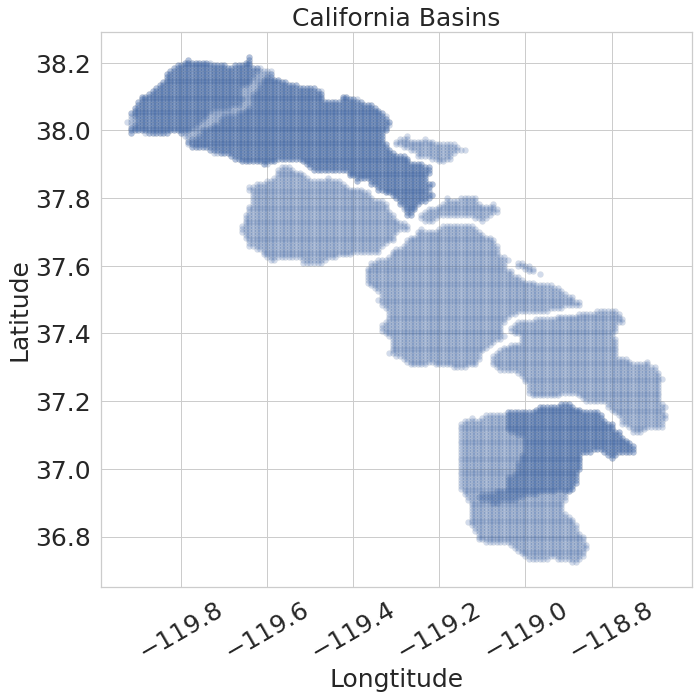

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(CA_dataframe['Longitude'], CA_dataframe['Latitude'],
             cmap = 'Blues',vmax=1, vmin=0,  edgecolor='k', linewidth=0.1, alpha=0.25)

plt.title('California Basins', fontsize = 25)
plt.xlabel('Longtitude', fontsize = 25)
plt.ylabel('Latitude', fontsize = 25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
plt.tight_layout()
fig.savefig('/scratch/users/lie08/CA_map.png', dpi=300)

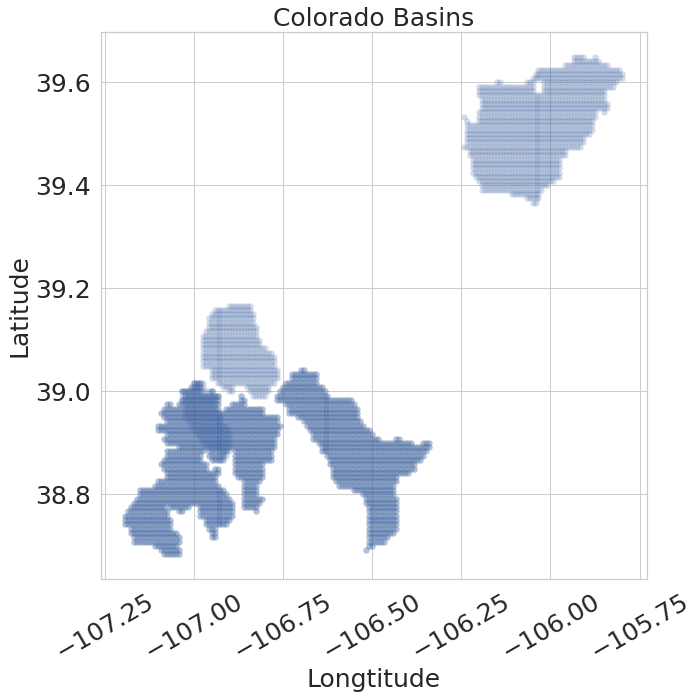

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(COL_dataframe['Longitude'], COL_dataframe['Latitude'],
             cmap = 'Blues',vmax=1, vmin=0,  edgecolor='k', linewidth=0.1, alpha=0.25)

plt.title('Colorado Basins', fontsize = 25)
plt.xlabel('Longtitude', fontsize = 25)
plt.ylabel('Latitude', fontsize = 25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
plt.tight_layout()
fig.savefig('/scratch/users/lie08/COL_map.png', dpi=300)

# Caluculating Bias

In [ ]:
    from sklearn.metrics import r2_score
    ASO_files = ['BR20190419_Data_set_SWE.csv', 'BR20190624_Data_set_SWE.csv', 'CB20160404_Data_set_SWE.csv',
                    'CM20190407_Data_set_SWE.csv', 'CM20190610_Data_set_SWE.csv', 'GE20180331_Data_set_SWE.csv',
                    'GE20180524_Data_set_SWE.csv', 'GE20190407_Data_set_SWE.csv', 'GE20190610_Data_set_SWE.csv',
                    'GT20180330_Data_set_SWE.csv', 'GT20190408_Data_set_SWE.csv', 'GT20190609_Data_set_SWE.csv']

    LM_Scaled = ['restore_best_weights=True_LM_test=BR20190419', 'restore_best_weights=True_LM_test=BR20190624',
                 'restore_best_weights=True_LM_test=CB20160404', 'restore_best_weights=True_LM_test=CM20190407',
                 'restore_best_weights=True_LM_test=CM20190610', 'restore_best_weights=True_LM_test=GE20180331',
                 'restore_best_weights=True_LM_test=GE20180524', 'restore_best_weights=True_LM_test=GE20190407',
                 'restore_best_weights=True_LM_test=GE20190610', 'restore_best_weights=True_LM_test=GT20180330',
                 'restore_best_weights=True_LM_test=GT20190408', 'restore_best_weights=True_LM_test=GT20190609']

    LM_Unscaled = ['Unscaled_LM_test=BR20190419', 'Unscaled_LM_test=BR20190624', 'Unscaled_LM_test=CB20160404',
                   'Unscaled_LM_test=CM20190407', 'Unscaled_LM_test=CM20190610', 'Unscaled_LM_test=GE20180331',
                   'Unscaled_LM_test=GE20180524', 'Unscaled_LM_test=GE20190407', 'Unscaled_LM_test=GE20190610',
                   'Unscaled_LM_test=GT20180330', 'Unscaled_LM_test=GT20190408', 'Unscaled_LM_test=GT20190609']

    TL_1_models = ['TL_partail_freezing_ with_SScalerBR20190419', 'TL_partail_freezing_ with_SScalerBR20190624',
            'TL_partail_freezing_ with_SScalerCB20160404', 'TL_partail_freezing_ with_SScalerCM20190407',
            'TL_partail_freezing_ with_SScalerCM20190610', 'TL_partail_freezing_ with_SScalerGE20180331',
            'TL_partail_freezing_ with_SScalerGE20180524', 'TL_partail_freezing_ with_SScalerGE20190407',
            'TL_partail_freezing_ with_SScalerGE20190610', 'TL_partail_freezing_ with_SScalerGT20180330',
            'TL_partail_freezing_ with_SScalerGT20190408', 'TL_partail_freezing_ with_SScalerGT20190609']

    TL_2_models = ['TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7BR20190419',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7BR20190624',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7CB20160404',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7CM20190407',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7CM20190610',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GE20180331',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GE20180524',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GE20190407',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GE20190610',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GT20180330',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GT20190408',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GT20190609']

    TL_3_models = ['TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7BR20190419',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7BR20190624',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7CB20160404',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7CM20190407',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7CM20190610',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GE20180331',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GE20180524',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GE20190407',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GE20190610',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GT20180330',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GT20190408',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GT20190609']


   #1. LOOCV method
    n_splits= len(ASO_files)
    kfold = KFold(n_splits, shuffle=False, random_state=None)
    Bias_LM = {}
    Bias_ULM = {}
    Bias_TL1 = {}
    Bias_TL2 = {}
    Bias_TL3 = {}


    for train_ix, test_ix in kfold.split(ASO_files):

        # load models
        LM_Scaled_model = keras.models.load_model('/scratch/users/lie08/Colorado_local_troubleshooting_version2_check/'+ LM_Scaled[test_ix[0]])
        LM_Unscaled_model = keras.models.load_model('/scratch/users/lie08/Unscaled_LM_models/' + LM_Unscaled[test_ix[0]])
        TL_1_model = keras.models.load_model('/scratch/users/lie08/TL_partial_freezing_Troubleshooting_check/' + TL_1_models[test_ix[0]])
        TL_2_model = keras.models.load_model('/scratch/users/lie08/Unzipping_home_all/TL_REM_ADD_Troubleshooting/' + TL_2_models[test_ix[0]])
        TL_3_model = keras.models.load_model('/scratch/users/lie08/Unzipping_home_all/TL_REM_ADD_Troubleshooting/' + TL_3_models[test_ix[0]])

        #3. TRAINING AND TEST FILES: Define training and test files for each iteration
        Test_file = ASO_files[test_ix[0]]
        Training_files = ASO_files[0: test_ix[0]] + ASO_files[test_ix[0] + 1: ]

        Var_list = ['Slope','Aspect','DEM','Sum PDD','Accumulated Snow','Accumulate Precipitation','Average Temperature','SWE']

        # Test set:
        df_test = pd.read_csv(Test_file, index_col = 0)
        df_Test = df_test[Var_list]


        # Trianing set
        df_train = pd.read_csv(Training_files[0])

        for file in Training_files[1:]:
            dataframe = pd.read_csv(file, index_col = 0)
            df_train = df_train.append(dataframe)

        df_Train = df_train[Var_list]

        last_num = len(Var_list) - 1
        X_train = df_Train.values[:, 0: last_num]
        y_train = df_Train.values[:, last_num]

        X_test =  df_Test.values[:, 0:last_num]
        y_test = df_Test.values[:, last_num]

        #4. MinMax scaler for TL2 and LM predictions.
        scaler =  MinMaxScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # predict with Scaled LM and TL 2
        LM_Scaled_predictions = LM_Scaled_model.predict(X_test_scaled)
        TL2_predictions = TL_2_model.predict(X_test_scaled)

        #4. Standard Scalar Scaling: for TL 1
        new_scaler =  StandardScaler()
        new_scaler.fit(X_train)
        X_train_StandardScaled = new_scaler.transform(X_train)
        X_test_StandardScaled = new_scaler.transform(X_test)

        # predict with TL 1
        TL1_predictions = TL_1_model.predict(X_test_StandardScaled)


        # predict with Unscaled LM and TL 3
        LM_Unscaled_predictions = LM_Unscaled_model.predict(X_test)
        TL3_predictions = TL_3_model.predict(X_test)

        labels = y_test

        # average SWE values to calculate bias
        mean_SWE = np.mean(labels)

        name = Test_file.split('_')[0]

        Bias_LM[name] = (np.mean(labels) - np.mean(LM_Scaled_predictions))/np.mean(labels)
        Bias_ULM[name] = (np.mean(labels) - np.mean(LM_Unscaled_predictions ))/np.mean(labels)
        Bias_TL1[name] = (np.mean(labels) - np.mean(TL1_predictions))/np.mean(labels)
        Bias_TL2[name] = (np.mean(labels) - np.mean(TL2_predictions))/np.mean(labels)
        Bias_TL3[name] = (np.mean(labels) - np.mean(TL3_predictions))/np.mean(labels)


# Printing Bias values for each test file, mean of bias, and mean of absolute bias

## for LMs

In [ ]:
    print(Bias_LM )
    mean = sum(Bias_LM .values()) / len(Bias_LM)
    print('mean is : ' +  str(mean))
    summ = 0
    x = lambda key : abs(Bias_LM[key])
    for key in Bias_ULM:
        summ += x(key)
        print(x(key))
    abs_mean = summ/len(Bias_LM)
    print('abs mean : ' + str(abs_mean))

{'BR20190419': 0.30681671919909165, 'BR20190624': 0.2276969376746494, 'CB20160404': 0.04683244546625678, 'CM20190407': -0.17007436258468167, 'CM20190610': 0.03597730124670552, 'GE20180331': 0.23792502729444692, 'GE20180524': -1.0224613284997253, 'GE20190407': 0.41241549990413207, 'GE20190610': 0.12672420536909373, 'GT20180330': -0.15533944598874821, 'GT20190408': -0.2501154932861818, 'GT20190609': -0.17157189357649963}
mean is : -0.03126453231512171
0.30681671919909165
0.2276969376746494
0.04683244546625678
0.17007436258468167
0.03597730124670552
0.23792502729444692
1.0224613284997253
0.41241549990413207
0.12672420536909373
0.15533944598874821
0.2501154932861818
0.17157189357649963
abs mean : 0.26366255500751773


## For unscaled LMs

In [ ]:
    print(Bias_ULM )
    mean = sum(Bias_ULM .values()) / len(Bias_ULM)
    print(mean)
    summ = 0
    x = lambda key : abs(Bias_ULM[key])
    for key in Bias_ULM:
        summ += x(key)
    abs_mean = summ/len(Bias_ULM)
    print(abs_mean)


{'BR20190419': 0.2925691623184773, 'BR20190624': 0.3984114362334342, 'CB20160404': 0.04389712290300908, 'CM20190407': -0.04857056427907777, 'CM20190610': 0.013730598223822662, 'GE20180331': 0.0192724755569379, 'GE20180524': 0.03520838700019381, 'GE20190407': 0.2428785169150918, 'GE20190610': 0.3568998699215557, 'GT20180330': 0.4247214746086911, 'GT20190408': 0.1871218504763752, 'GT20190609': -0.22873414090540534}
0.14478384908109213
0.19100129994517265


## For TL1 models

In [ ]:
    print(Bias_TL1)
    mean = sum(Bias_TL1 .values()) / len(Bias_TL1)
    print(mean)
    summ = 0
    x = lambda key : abs(Bias_TL1[key])
    for key in Bias_TL1:
        summ += x(key)
    abs_mean = summ/len(Bias_TL1)
    print(abs_mean)

{'BR20190419': 0.07564805387151587, 'BR20190624': 0.15506811570005904, 'CB20160404': -0.031181723628371533, 'CM20190407': -0.37119923835668783, 'CM20190610': -0.04869795722392163, 'GE20180331': -0.03515112898061146, 'GE20180524': -0.17627377049918752, 'GE20190407': 0.3048086316294058, 'GE20190610': 0.2664793023736978, 'GT20180330': 0.050617476706978116, 'GT20190408': -0.16515602428311438, 'GT20190609': -0.33029158116486296}
-0.02544415365459172
0.16754775036820113


## For TL2 models

In [ ]:

    print(Bias_TL2)
    mean = sum(Bias_TL2 .values()) / len(Bias_TL2)
    print(mean)
    summ = 0
    x = lambda key : abs(Bias_TL2[key])
    for key in Bias_TL2:
        summ += x(key)
    abs_mean = summ/len(Bias_TL2)
    print(abs_mean)

{'BR20190419': 0.20003847065466054, 'BR20190624': 0.4032675010635262, 'CB20160404': -0.006028889166174899, 'CM20190407': -0.29699566967299845, 'CM20190610': 0.008774458349120464, 'GE20180331': -0.004285908295967708, 'GE20180524': -0.38067212584708715, 'GE20190407': 0.3232697297960425, 'GE20190610': 0.12264259556276653, 'GT20180330': -0.1882855544894977, 'GT20190408': -0.2819633668378893, 'GT20190609': -0.6993155118744511}
-0.0666295225631625
0.24296164846751522


## For TL3 models

In [ ]:
    print(Bias_TL3)
    mean = sum(Bias_TL3 .values()) / len(Bias_TL3)
    print(mean)
    summ = 0
    x = lambda key : abs(Bias_TL3[key])
    for key in Bias_TL3:
        summ += x(key)
    abs_mean = summ/len(Bias_TL3)
    print(abs_mean)

{'BR20190419': 0.2778659687840131, 'BR20190624': 0.2478629857015446, 'CB20160404': -0.010715230209275152, 'CM20190407': -0.16030207473932012, 'CM20190610': 0.08053742652234559, 'GE20180331': -0.05394070989806771, 'GE20180524': -0.2739102695807446, 'GE20190407': 0.35863889224045886, 'GE20190610': 0.3112355383516304, 'GT20180330': -0.024735857258038632, 'GT20190408': -0.04529127373940452, 'GT20190609': -0.20914479404640154}
0.04150838351072836
0.17118175175593708


# Calculating R_squared std

In [ ]:
    from sklearn.metrics import r2_score
    ASO_files = ['BR20190419_Data_set_SWE.csv', 'BR20190624_Data_set_SWE.csv', 'CB20160404_Data_set_SWE.csv',
                    'CM20190407_Data_set_SWE.csv', 'CM20190610_Data_set_SWE.csv', 'GE20180331_Data_set_SWE.csv',
                    'GE20180524_Data_set_SWE.csv', 'GE20190407_Data_set_SWE.csv', 'GE20190610_Data_set_SWE.csv',
                    'GT20180330_Data_set_SWE.csv', 'GT20190408_Data_set_SWE.csv', 'GT20190609_Data_set_SWE.csv']

    LM_Scaled = ['restore_best_weights=True_LM_test=BR20190419', 'restore_best_weights=True_LM_test=BR20190624',
                 'restore_best_weights=True_LM_test=CB20160404', 'restore_best_weights=True_LM_test=CM20190407',
                 'restore_best_weights=True_LM_test=CM20190610', 'restore_best_weights=True_LM_test=GE20180331',
                 'restore_best_weights=True_LM_test=GE20180524', 'restore_best_weights=True_LM_test=GE20190407',
                 'restore_best_weights=True_LM_test=GE20190610', 'restore_best_weights=True_LM_test=GT20180330',
                 'restore_best_weights=True_LM_test=GT20190408', 'restore_best_weights=True_LM_test=GT20190609']

    LM_Unscaled = ['Unscaled_LM_test=BR20190419', 'Unscaled_LM_test=BR20190624', 'Unscaled_LM_test=CB20160404',
                   'Unscaled_LM_test=CM20190407', 'Unscaled_LM_test=CM20190610', 'Unscaled_LM_test=GE20180331',
                   'Unscaled_LM_test=GE20180524', 'Unscaled_LM_test=GE20190407', 'Unscaled_LM_test=GE20190610',
                   'Unscaled_LM_test=GT20180330', 'Unscaled_LM_test=GT20190408', 'Unscaled_LM_test=GT20190609']

    TL_1_models = ['TL_partail_freezing_ with_SScalerBR20190419', 'TL_partail_freezing_ with_SScalerBR20190624',
            'TL_partail_freezing_ with_SScalerCB20160404', 'TL_partail_freezing_ with_SScalerCM20190407',
            'TL_partail_freezing_ with_SScalerCM20190610', 'TL_partail_freezing_ with_SScalerGE20180331',
            'TL_partail_freezing_ with_SScalerGE20180524', 'TL_partail_freezing_ with_SScalerGE20190407',
            'TL_partail_freezing_ with_SScalerGE20190610', 'TL_partail_freezing_ with_SScalerGT20180330',
            'TL_partail_freezing_ with_SScalerGT20190408', 'TL_partail_freezing_ with_SScalerGT20190609']

    TL_2_models = ['TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7BR20190419',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7BR20190624',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7CB20160404',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7CM20190407',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7CM20190610',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GE20180331',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GE20180524',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GE20190407',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GE20190610',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GT20180330',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GT20190408',
            'TL_freeze_model_with_MINMAX_Scaler_Added_layer =1rem_layers =7GT20190609']

    TL_3_models = ['TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7BR20190419',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7BR20190624',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7CB20160404',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7CM20190407',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7CM20190610',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GE20180331',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GE20180524',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GE20190407',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GE20190610',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GT20180330',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GT20190408',
            'TL_freeze_model_Without_scalingAdded_layer =1rem_layers =7GT20190609']


   #1. LOOCV method
    n_splits= len(ASO_files)
    kfold = KFold(n_splits, shuffle=False, random_state=None)
    LM =[]
    ULM = []
    TL1 =[]
    TL2 = []
    TL3 = []
    for train_ix, test_ix in kfold.split(ASO_files):

        # load models
        LM_Scaled_model = keras.models.load_model('/scratch/users/lie08/Colorado_local_troubleshooting_version2_check/'+ LM_Scaled[test_ix[0]])
        LM_Unscaled_model = keras.models.load_model('/scratch/users/lie08/Unscaled_LM_models/' + LM_Unscaled[test_ix[0]])
        TL_1_model = keras.models.load_model('/scratch/users/lie08/TL_partial_freezing_Troubleshooting_check/' + TL_1_models[test_ix[0]])
        TL_2_model = keras.models.load_model('/scratch/users/lie08/Unzipping_home_all/TL_REM_ADD_Troubleshooting/' + TL_2_models[test_ix[0]])
        TL_3_model = keras.models.load_model('/scratch/users/lie08/Unzipping_home_all/TL_REM_ADD_Troubleshooting/' + TL_3_models[test_ix[0]])

        #3. TRAINING AND TEST FILES: Define training and test files for each iteration
        Test_file = ASO_files[test_ix[0]]
        Training_files = ASO_files[0: test_ix[0]] + ASO_files[test_ix[0] + 1: ]

        Var_list = ['Slope','Aspect','DEM','Sum PDD','Accumulated Snow','Accumulate Precipitation','Average Temperature','SWE']

        # Test set:
        df_test = pd.read_csv(Test_file, index_col = 0)
        df_Test = df_test[Var_list]


        # Trianing set
        df_train = pd.read_csv(Training_files[0])

        for file in Training_files[1:]:
            dataframe = pd.read_csv(file, index_col = 0)
            df_train = df_train.append(dataframe)

        df_Train = df_train[Var_list]

        last_num = len(Var_list) - 1
        X_train = df_Train.values[:, 0: last_num]
        y_train = df_Train.values[:, last_num]

        X_test =  df_Test.values[:, 0:last_num]
        y_test = df_Test.values[:, last_num]

        #4. MinMax Scaler for TL2 and LM
        scaler =  MinMaxScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # predict with Scaled LM and TL 2
        LM_Scaled_predictions = LM_Scaled_model.predict(X_test_scaled)
        TL2_predictions = TL_2_model.predict(X_test_scaled)

        #4. Standard Scalar Scaling: for TL 1
        new_scaler =  StandardScaler()
        new_scaler.fit(X_train)
        X_train_StandardScaled = new_scaler.transform(X_train)
        X_test_StandardScaled = new_scaler.transform(X_test)

        # predict with TL 1
        TL1_predictions = TL_1_model.predict(X_test_StandardScaled)


        # predict with Unscaled LM and TL 3
        LM_Unscaled_predictions = LM_Unscaled_model.predict(X_test)
        TL3_predictions = TL_3_model.predict(X_test)

        labels = y_test

        # R2 values
        LM_Scaled_R2 = r2_score(labels, LM_Scaled_predictions)
        LM_Unscaled_R2 = r2_score(labels, LM_Unscaled_predictions)
        TL1_R2 = r2_score(labels, TL1_predictions)
        TL2_R2 = r2_score(labels, TL2_predictions)
        TL3_R2 = r2_score(labels, TL3_predictions)

        LM.append(LM_Scaled_R2)
        ULM.append(LM_Unscaled_R2)
        TL1.append(TL1_R2 )
        TL2.append(TL2_R2 )
        TL3.append(TL3_R2 )

    LM_std = np.std(LM)
    ULM_std = np.std(ULM)
    TL1_std = np.std(TL1)
    TL2_std = np.std(TL2)
    TL3_std = np.std(TL3)

    print(LM_std)
    print(ULM_std)
    print(TL1_std)
    print(TL2_std)
    print(TL3_std)


0.3770436778966713
0.3245902872449064
0.30937976752083385
0.2384771197932619
0.2783651486909683


# Box plot of feature importance

## For TL3

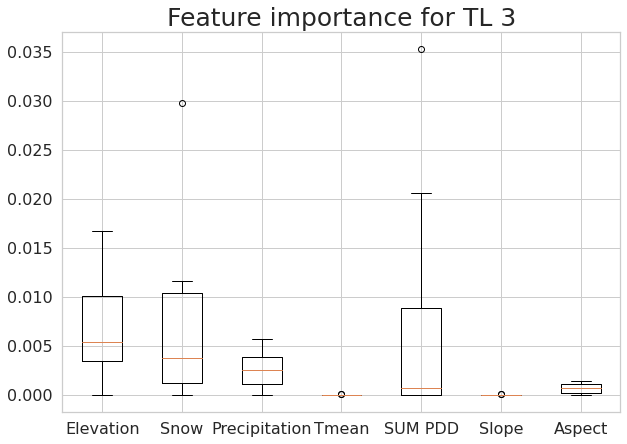

In [ ]:
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)
DEM = [0.0036, 0.0096, 0.0117, 0.0032, 0.0035, 0.0021, 0.0167, 0.0053, 0.0139, 0.0072, 0.0056, 0]
snow = [0.0003, 0.0037, 0.0103, 0.0015, 0.0001, 0.0036, 0.0298, 0.0116, 0.0109, 0.0039, 0.0067, 0]
precip = [0.0051, 0.0057, 0.0039, 0, 0.0002, 0.0014, 0.004, 0.0032, 0.0034, 0.002, 0.0016, 0]
tem = [0, 0, 0, 0, 0, 0,0.0001, 0.0001, 0, 0, 0,0]
pdd = [0, 0.0006, 0.0206, 0.0086, 0, 0, 0.0353, 0.0022, 0.0008, 0.0097, 0.0004,0]
slope = [0, 0, 0, 0, 0, 0, 0.0001, 0, 0, 0.0001, 0, 0]
aspect = [0.0009, 0.0014, 0.0008, 0, 0.0003, 0.001, 0.0013, 0, 0.0013, 0.0001, 0.0004, 0.0007]
data = [DEM, snow, precip, tem, pdd, slope, aspect]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
# Creating plot
bp = ax.boxplot(data)
ax.set_xticklabels(['Elevation', 'Snow', 'Precipitation', 'Tmean', 'SUM PDD', 'Slope', 'Aspect'])
plt.title("Feature importance for TL 3", fontsize = 25)
fig.savefig('/scratch/users/lie08/BOXplot_TL3.png', dpi=300)
plt.show()

## For TL2

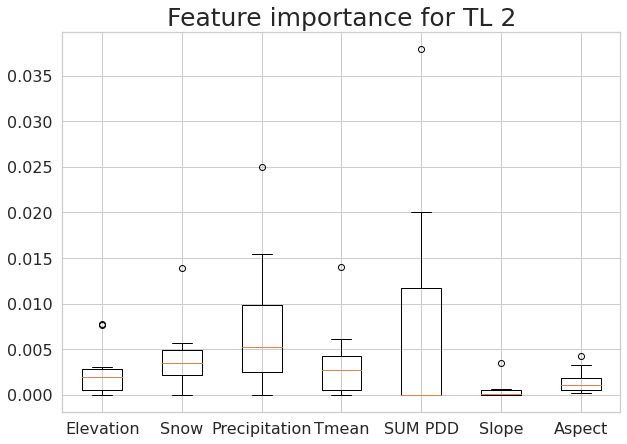

In [ ]:
matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)
DEM = [0.0009, 0, 0.0021, 0, 0.0028, 0.0018, 0.0021, 0.0031, 0.0077, 0.0007, 0.0078, 0]
snow = [0.0029, 0.0057, 0.0034, 0.0002, 0, 0.0029, 0.0139, 0.0049, 0.005, 0.0044, 0.0037, 0]
precip = [0.0088, 0.0154, 0.0129, 0.0039, 0.0013, 0.0025, 0.0250, 0.0024, 0.0067, 0.0058, 0.0047, 0]
tem = [0.0013, 0, 0.0034, 0.0038, 0, 0.014, 0.0044, 0.002, 0.0061, 0.0043, 0.0007, 0]
pdd = [0, 0, 0.0165, 0.0201, 0, 0, 0.0379, 0.0029, 0, 0.0102, 0.0001, 0]
slope = [0.0007,0, 0, 0, 0.0001, 0.0005, 0, 0.0005, 0.0005, 0.0002, 0.0035, 0]
aspect = [0.0033, 0.0015, 0.0018, 0.0002, 0.0008, 0.0012, 0.0019, 0.0006, 0.0043, 0.0004, 0.0006, 0.0011]
data = [DEM, snow, precip, tem, pdd, slope, aspect]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
# Creating plot
bp = ax.boxplot(data)
ax.set_xticklabels(['Elevation', 'Snow', 'Precipitation',  'Tmean', 'SUM PDD', 'Slope', 'Aspect' ])
plt.title("Feature importance for TL 2", fontsize = 25)
fig.savefig('/scratch/users/lie08/BOXplot_TL2.png', dpi=300)
plt.show()